# Feature Mapping 

In this technique we map the points in 1-D feature space to a 2-D dimensional feature space, so that they are linearly separable in the higher space

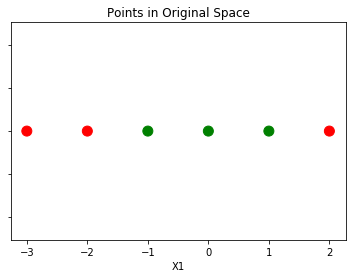

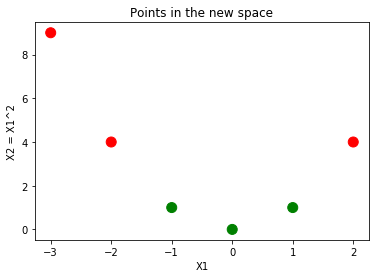

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
colors = {0:'red', 1:'green'}
color =[0, 0, 1, 1, 1, 0]
x = [-3, -2, -1, 0, 1, 2]
y = [0, 0, 0, 0, 0, 0]

x2 = [i**2 for i in x] ## New feature.

df = pd.DataFrame(dict(X=x, Y=y, X2=x2, color=color))
features = ['X', 'X2']

fig, ax = plt.subplots()
fig2, ax2 = plt.subplots()
ax.scatter(df['X'], df['Y'], c=df['color'].apply(lambda x: colors[x]), s=100)
ax.set_title("Points in Original Space")
ax.set_xlabel("X1")
plt.setp( ax.get_yticklabels(), visible=False)
ax2.scatter(df['X'], df['X2'], c=df['color'].apply(lambda x: colors[x]), s=100)
ax2.set_title("Points in the new space")
ax2.set_xlabel("X1")
ax2.set_ylabel("X2 = X1^2")
plt.show()

In [3]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(df[features], df['color'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

[[ -2.00000000e-04  -6.66600000e-01]]


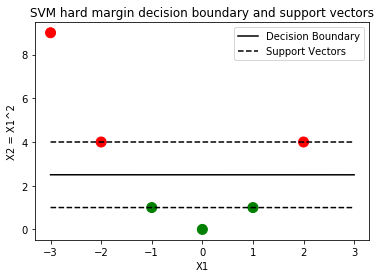

In [4]:
# get the separating hyperplane
print clf.coef_
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-3, 3)
yy = a * xx - (clf.intercept_[0]) / w[1]
    
# plot the parallels to the separating hyperplane that pass through the
# support vectors
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy + 1 * margin
yy_up = yy - 1 * margin
    
plt.clf()
fig, ax = plt.subplots()
ax.scatter(df['X'], df['X2'], c=df['color'].apply(lambda x: colors[x]), s=100, label='')
ax.set_title("SVM hard margin decision boundary and support vectors")
ax.set_xlabel("X1")
ax.set_ylabel("X2 = X1^2")

plt.plot(xx, yy, 'k-', label='Decision Boundary')
plt.plot(xx, yy_down, 'k--', label='Support Vectors')
plt.plot(xx, yy_up, 'k--')
plt.legend()
plt.show()

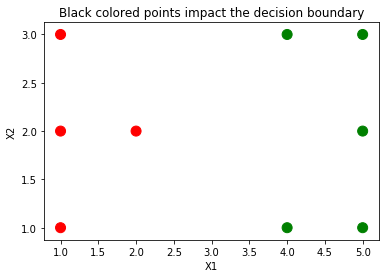

In [5]:
colors = {0:'red', 1:'green', 2:'black'}
color =[0, 0, 0,0,1,1, 1, 1, 1]
#color =[2,2,2,2,2,2,2,2,2]
x1 = [1, 1, 1,2,4,4,  5, 5, 5]
x2 = [1, 2, 3,2,1,3, 1, 2, 3]

df = pd.DataFrame(dict(X1=x1,  X2=x2, color=color))
features = ['X1', 'X2']

fig2, ax2 = plt.subplots()
ax2.scatter(df['X1'], df['X2'], c=df['color'].apply(lambda x: colors[x]), s=[100 , 100, 100, 100, 100, 100, 100, 100, 100])
ax2.set_title("Black colored points impact the decision boundary")
ax2.set_xlabel("X1")
ax2.set_ylabel("X2")
plt.show()

In [6]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C=100000000)
clf.fit(df[features], df['color'])

SVC(C=100000000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

[[  1.00019200e+00   3.84000000e-04]]


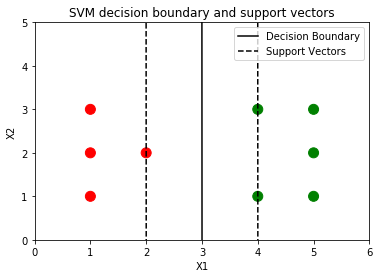

In [7]:
# get the separating hyperplane
print clf.coef_
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]
    
# plot the parallels to the separating hyperplane that pass through the
# support vectors
# plot the parallels to the separating hyperplane that pass through the
# support vectors

b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])


    
plt.clf()
fig, ax = plt.subplots()
ax.scatter(df['X1'], df['X2'], c=df['color'].apply(lambda x: colors[x]), s=100, label='')
ax.set_title("SVM decision boundary and support vectors")
ax.set_ylim([0, 5])
ax.set_xlim([0, 6])

ax.set_xlabel("X1")
ax.set_ylabel("X2")

plt.plot(xx, yy, 'k-', label='Decision Boundary')
plt.plot(xx, yy_down, 'k--', label='Support Vectors')
plt.plot(xx, yy_up, 'k--')
plt.legend()
plt.show()